In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import matplotlib.dates as mdates

%matplotlib inline
warnings.filterwarnings('ignore')

### Reading all .csv files and saving them in a dictionary with respective keys and deleting the second header

In [2]:
filenames = {'May': 'C:\\Users\\nikit\\Desktop\\RegenerationAcademy\\Project\\Data\\May.csv', 
             'June': 'C:\\Users\\nikit\\Desktop\\RegenerationAcademy\\Project\\Data\\June.csv',
             'July': 'C:\\Users\\nikit\\Desktop\\RegenerationAcademy\\Project\\Data\\July.csv',
             'August': 'C:\\Users\\nikit\\Desktop\\RegenerationAcademy\\Project\\Data\\August.csv',
             'September': 'C:\\Users\\nikit\\Desktop\\RegenerationAcademy\\Project\\Data\\September.csv',
             'October': 'C:\\Users\\nikit\\Desktop\\RegenerationAcademy\\Project\\Data\\October.csv'}

In [3]:
data = {}

for key, filename in filenames.items():
    data[key] = pd.read_csv(filename, header=[0,1], index_col=0, delimiter=';', encoding = "ISO-8859-1")
    data[key].columns = data[key].columns.droplevel(-1)

### Identifying variables that interest us and correct the ones with faults

In [4]:
wrong_names = {'mill_injection_water_m3_h_pv': 'mill_injection_water_m3/h_pv',
               'main_fan_speed_rpm_pv': 'fan_speed_rpm_pv',
               'total_feed_ton_h_pv': 'total_feed_ton/h_pv',
               'fly_ash_1_ton_h_pv': 'fly_ash_1_ton/h_pv',
               'fly_ash_2_ton_h_pv': 'fly_ash_2_ton/h_pv'}

In [5]:
for correct, wrong in wrong_names.items():
    data['July'][correct] = data['July'][correct].combine_first(data['July'][wrong])
    data['July'] = data['July'].drop(columns=[wrong])

    for key, value in data.items():
        if wrong in value.columns:
            value.rename(columns = {wrong: correct}, inplace=True)

### Creating an identical dictionary with the six DFs keeping only the needed columns

In [7]:
data = {}

for key, values in data.items():
    data[key] = data[key][[
        'date',
        'total_feed_ton_h_pv',
        'fly_ash_1_ton_h_pv',
        'fly_ash_2_ton_h_pv',
        'main_fan_speed_rpm_pv',
        'separator_speed_rpm_pv',
        'grinding_pressure_bar_pv',
        'mill_injection_water_m3_h_pv',
        'bucket_elv_mtr_pwr_kw_pv',
        'mill_motor_pwr_kw_pv',
        'mill_operation',
        'mill_dp_mbar_pv']]

### Concatenating them together into a big one

In [8]:
data = pd.concat([data[d] for d in data.keys()], ignore_index=True)

### Correcting bad formatting and typing

In [10]:
data = data[data[:]!='ERROR']
data.dropna(axis='index', inplace=True)
data.reset_index(drop=True, inplace=True)

In [11]:
data[data.columns[1:]] = data[data.columns[1:]].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [12]:
data.dropna(axis='index', inplace=True)
data.reset_index(drop=True, inplace=True)

### Using filters to keep the variables during normal operation conditions

In [13]:
mask = (data['mill_motor_pwr_kw_pv']>500) & (data['mill_motor_pwr_kw_pv']<1500) & (data['total_feed_ton_h_pv']<80) & (data['total_feed_ton_h_pv']>40) & (data['mill_operation']==1)
data = data[mask].reset_index(drop=True)

### Isolating only the inputs and output

In [ ]:
model_data = data[['date', 'total_feed_ton_h_pv', 'fly_ash_1_ton_h_pv', 'fly_ash_2_ton_h_pv', 'main_fan_speed_rpm_pv',
                   'separator_speed_rpm_pv', 'grinding_pressure_bar_pv', 'mill_injection_water_m3_h_pv',
                   'bucket_elv_mtr_pwr_kw_pv', 'mill_dp_mbar_pv']]

In [16]:
data.to_hdf('model2.h5', 'df')

### Visualization of the distributions of the respective inputs and important variables

### Total feed - Cement Type ii and iv

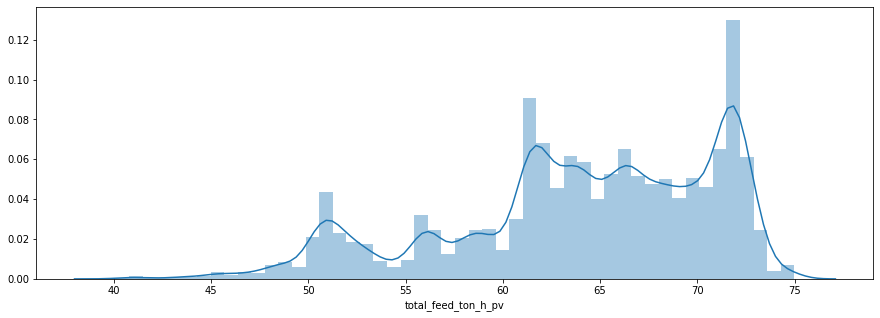

In [45]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_ii['total_feed_ton_h_pv'])

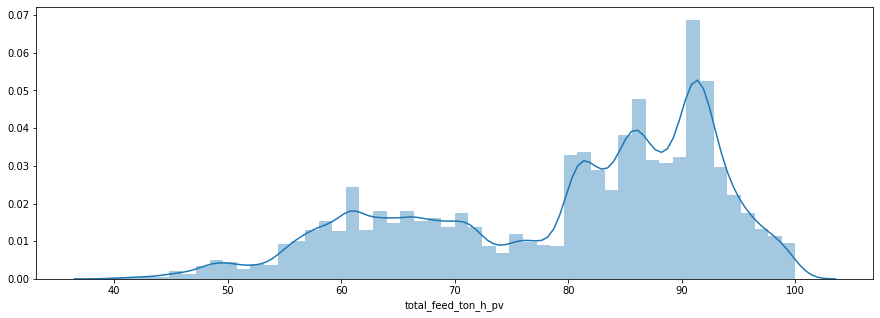

In [46]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_iv['total_feed_ton_h_pv'])

### Fly ash 1 - Cement Type ii and iv

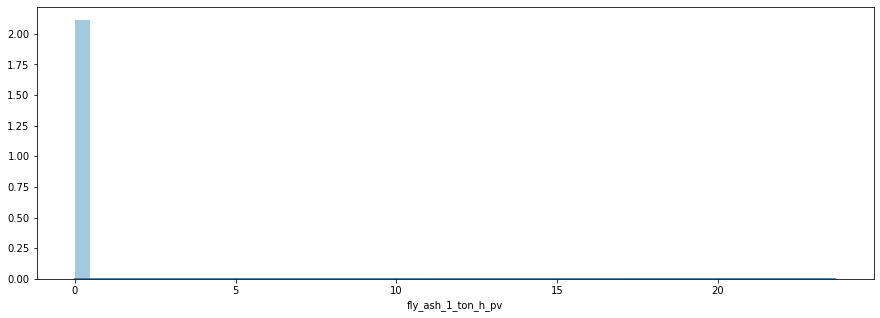

In [47]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_ii['fly_ash_1_ton_h_pv'])

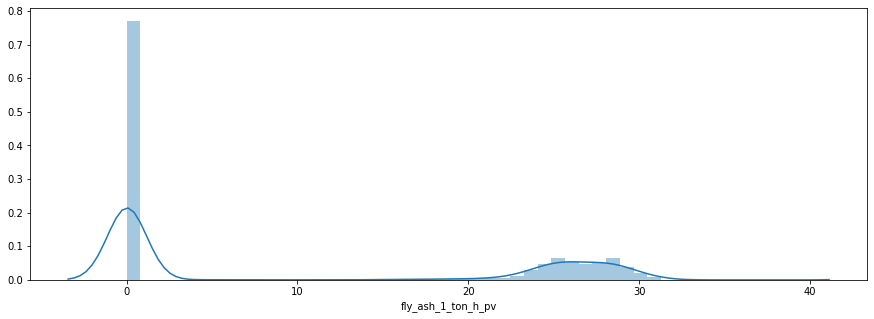

In [48]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_iv['fly_ash_1_ton_h_pv'])

### Fly ash 2 - Cement Type ii and iv

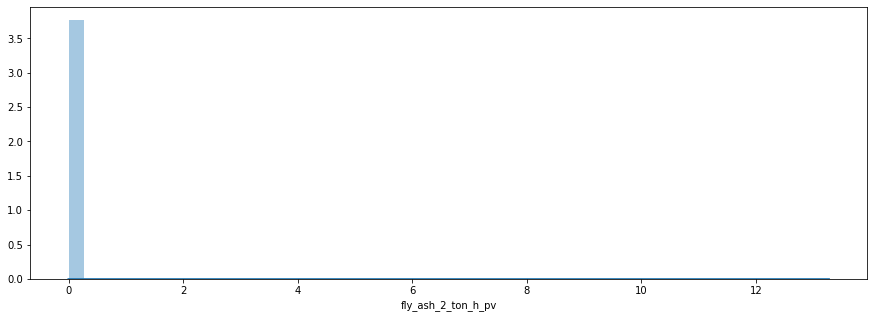

In [49]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_ii['fly_ash_2_ton_h_pv'])

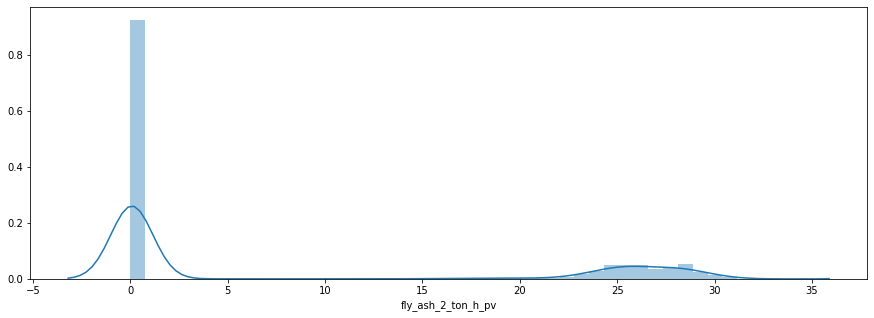

In [50]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_iv['fly_ash_2_ton_h_pv'])

### Fan speed - Cement type ii and iv

(0, 2500)

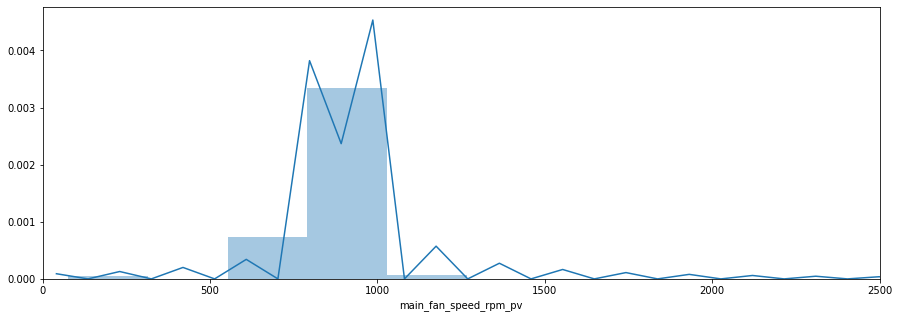

In [15]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_ii['main_fan_speed_rpm_pv'])
plt.xlim(0,2500)

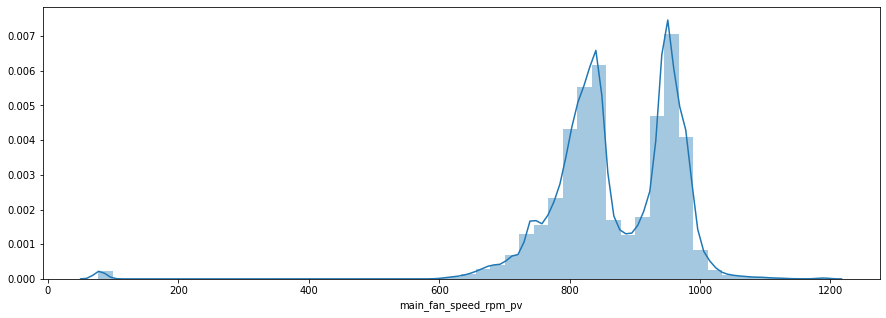

In [52]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_iv['main_fan_speed_rpm_pv'])
# plt.xlim(0,2000)

### Separator speed - Cement type ii and iv

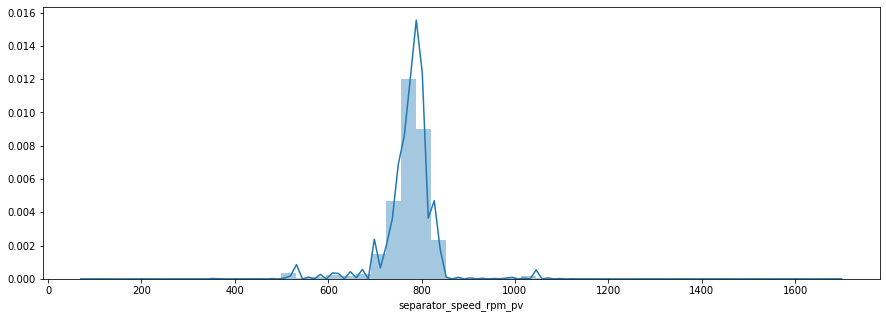

In [53]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_ii['separator_speed_rpm_pv'])

(400, 900)

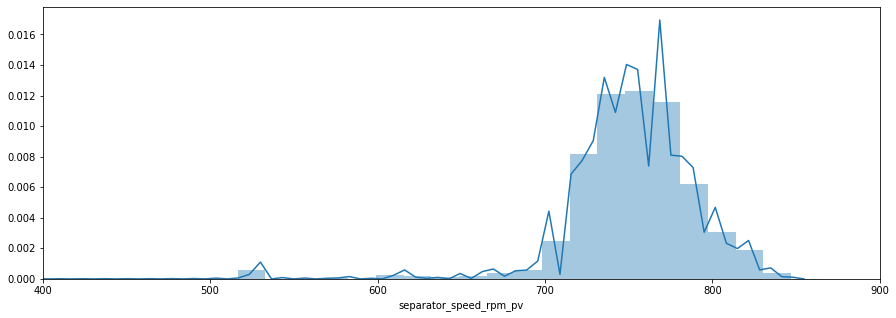

In [70]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_iv['separator_speed_rpm_pv'])
plt.xlim(400, 900)

### Grinding pressure - Cement type ii and iv

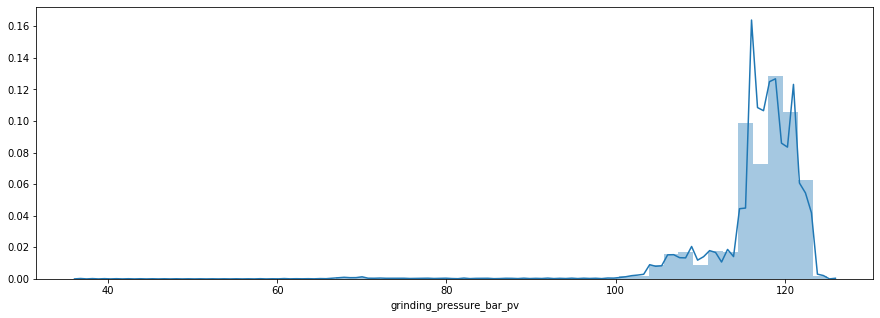

In [55]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_ii['grinding_pressure_bar_pv'])

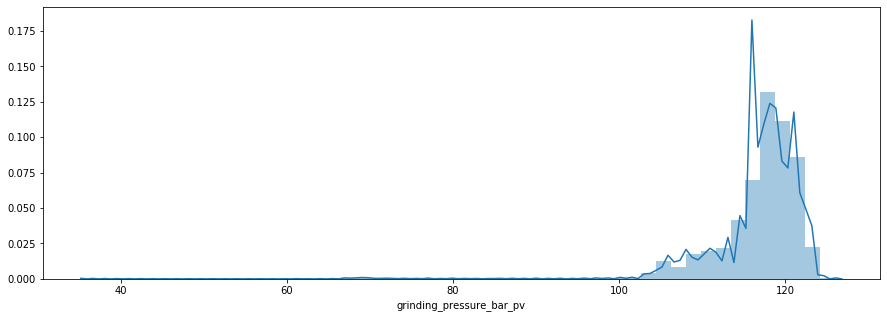

In [56]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_iv['grinding_pressure_bar_pv'])

### Water injection - Cement type ii and iv

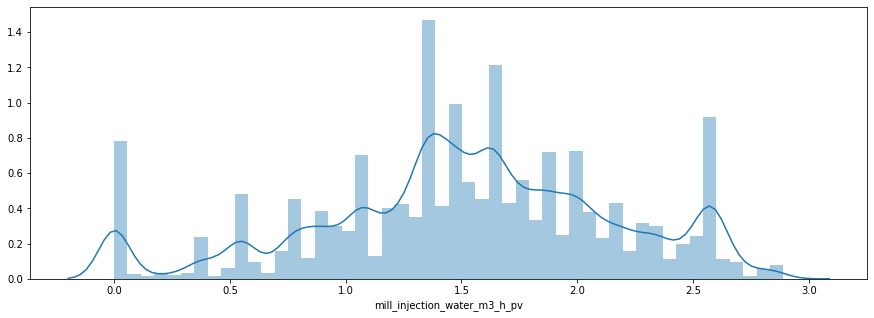

In [57]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_ii['mill_injection_water_m3_h_pv'])

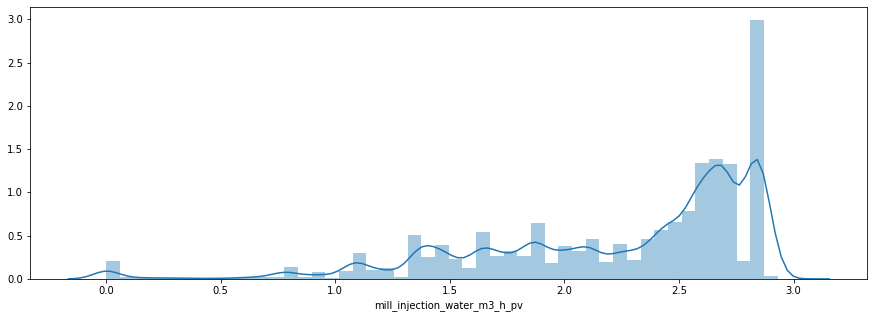

In [58]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_iv['mill_injection_water_m3_h_pv'])

### Elevator power - cement type ii and iv

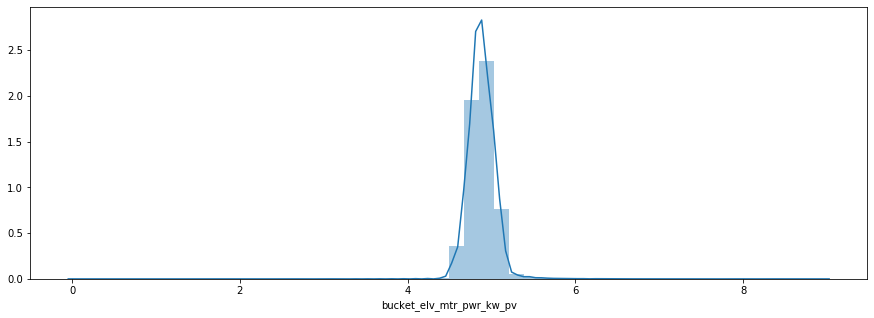

In [59]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_ii['bucket_elv_mtr_pwr_kw_pv'])

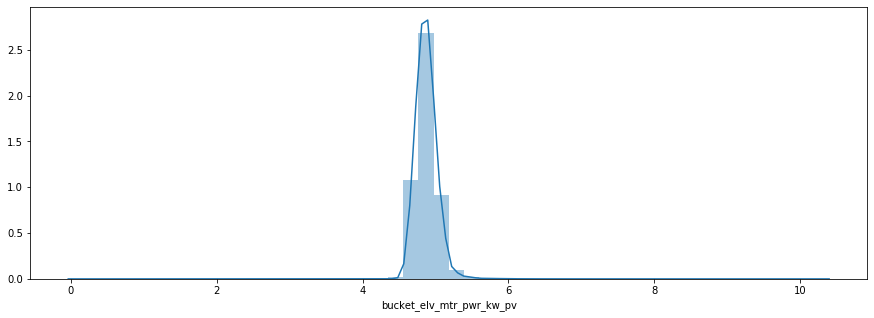

In [60]:
plt.figure(figsize=(15,5))
sns.distplot(data_cem_iv['bucket_elv_mtr_pwr_kw_pv'])

### Correlations between the inputs and important variables, and the output

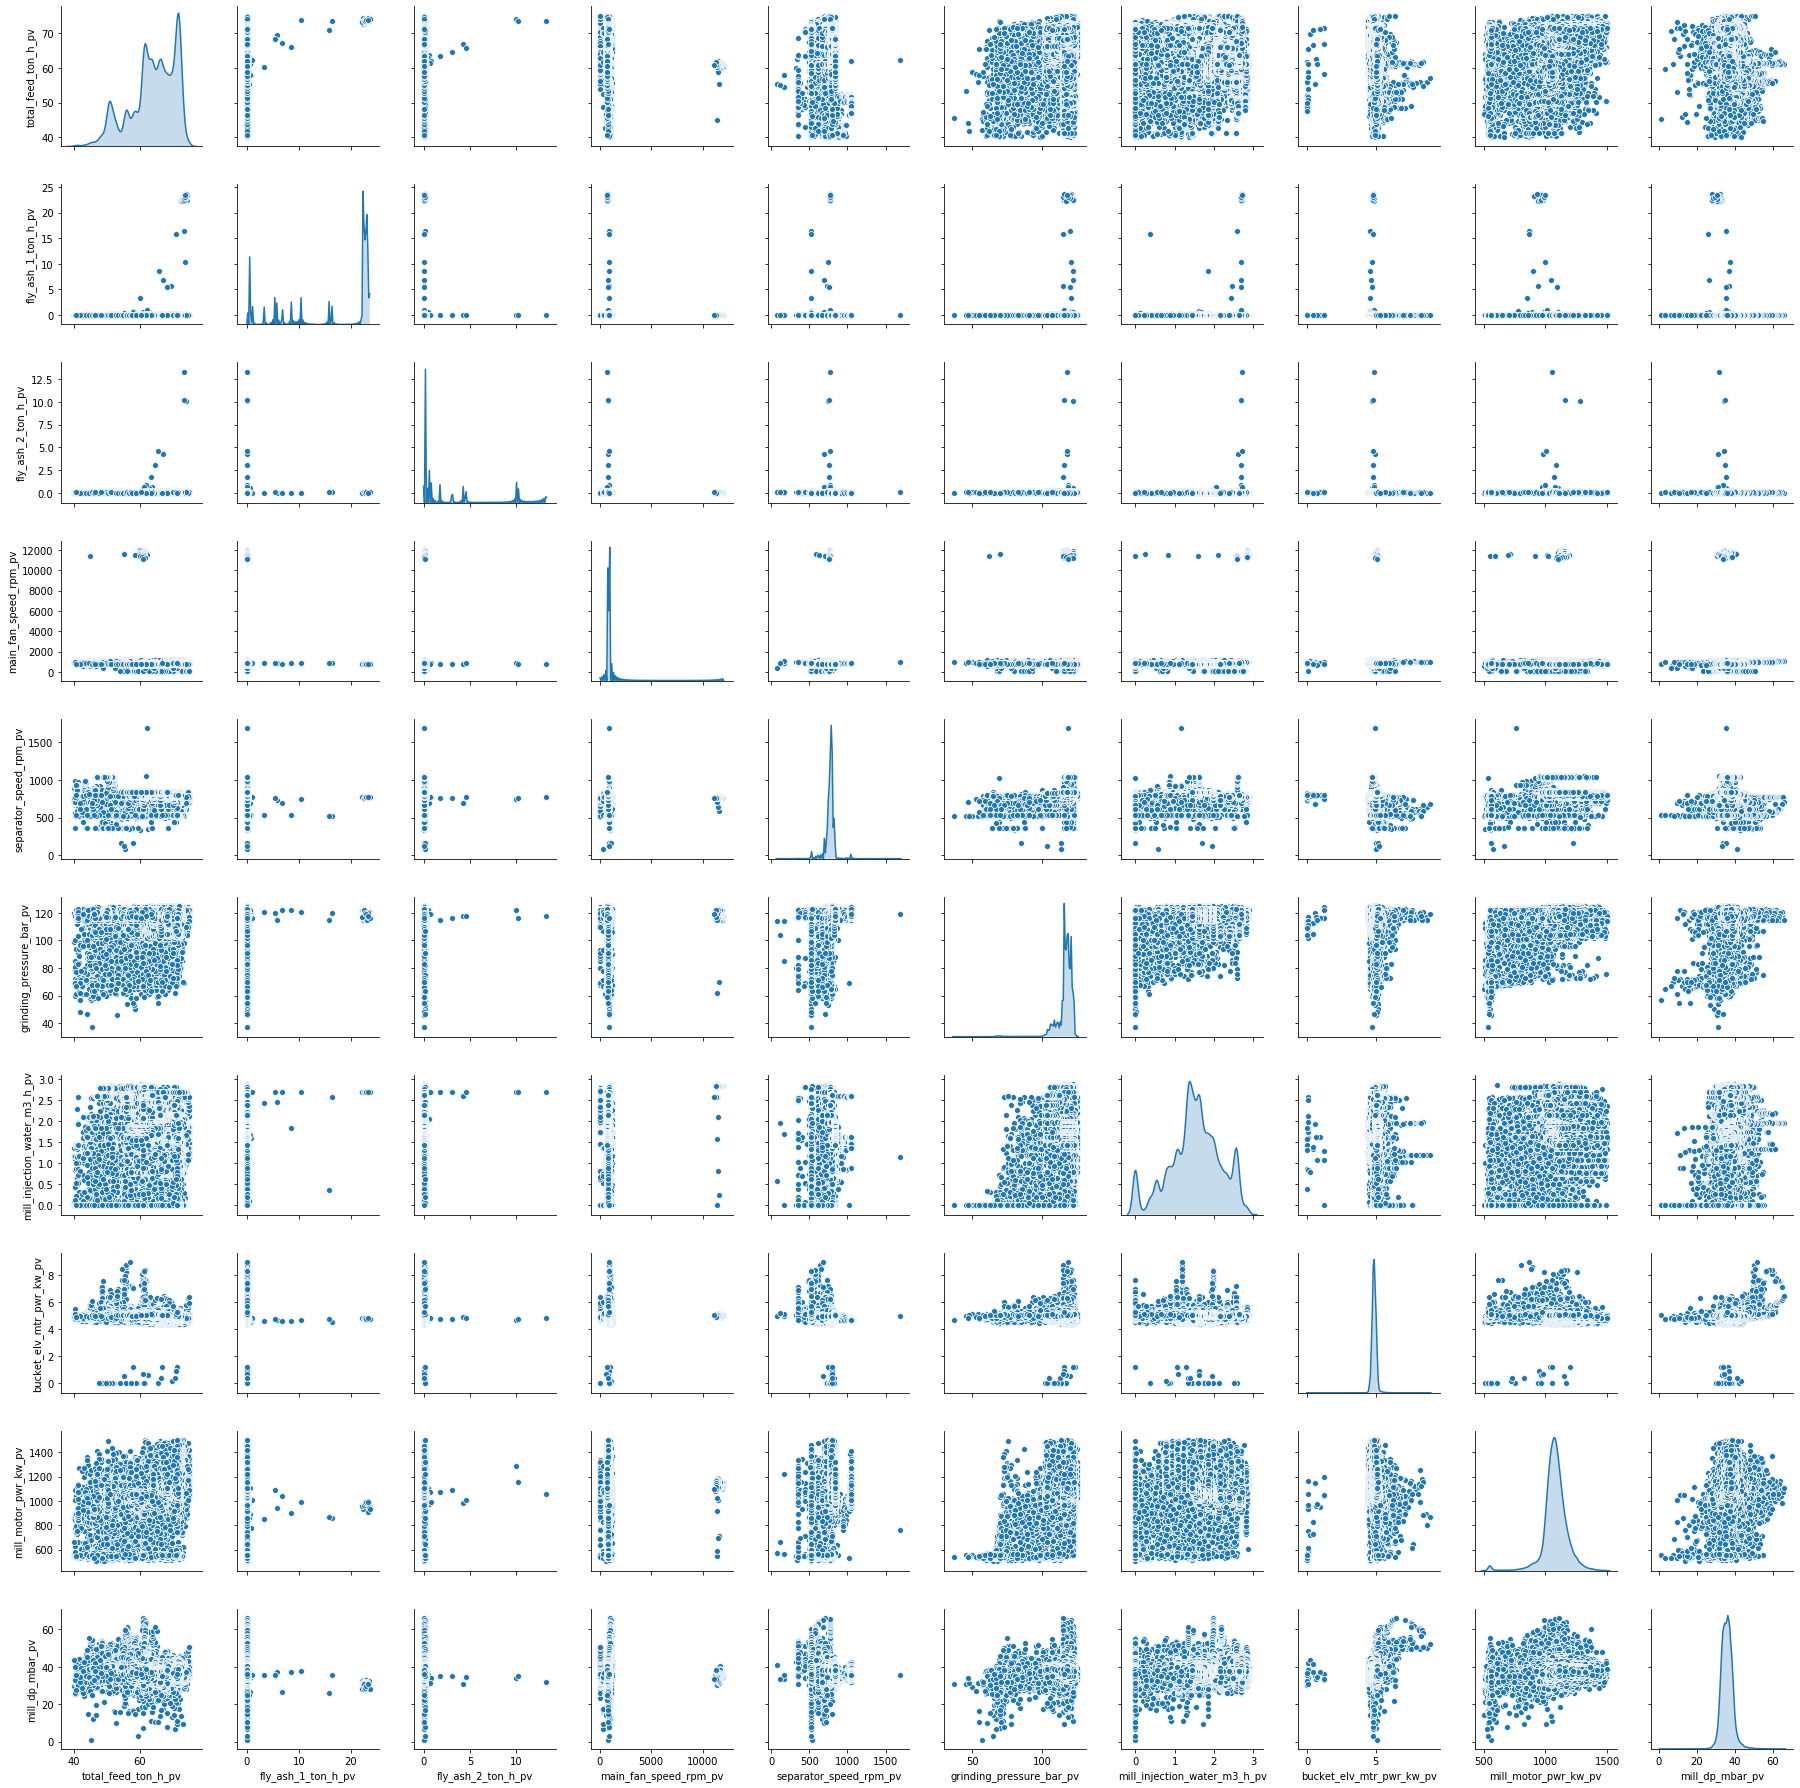

In [61]:
sns.pairplot(data_cem_ii, vars=['total_feed_ton_h_pv', 'fly_ash_1_ton_h_pv', 'fly_ash_2_ton_h_pv', 'main_fan_speed_rpm_pv',
                        'separator_speed_rpm_pv', 'grinding_pressure_bar_pv', 'mill_injection_water_m3_h_pv',
                        'bucket_elv_mtr_pwr_kw_pv', 'mill_motor_pwr_kw_pv', 'mill_dp_mbar_pv'] , diag_kind="kde")

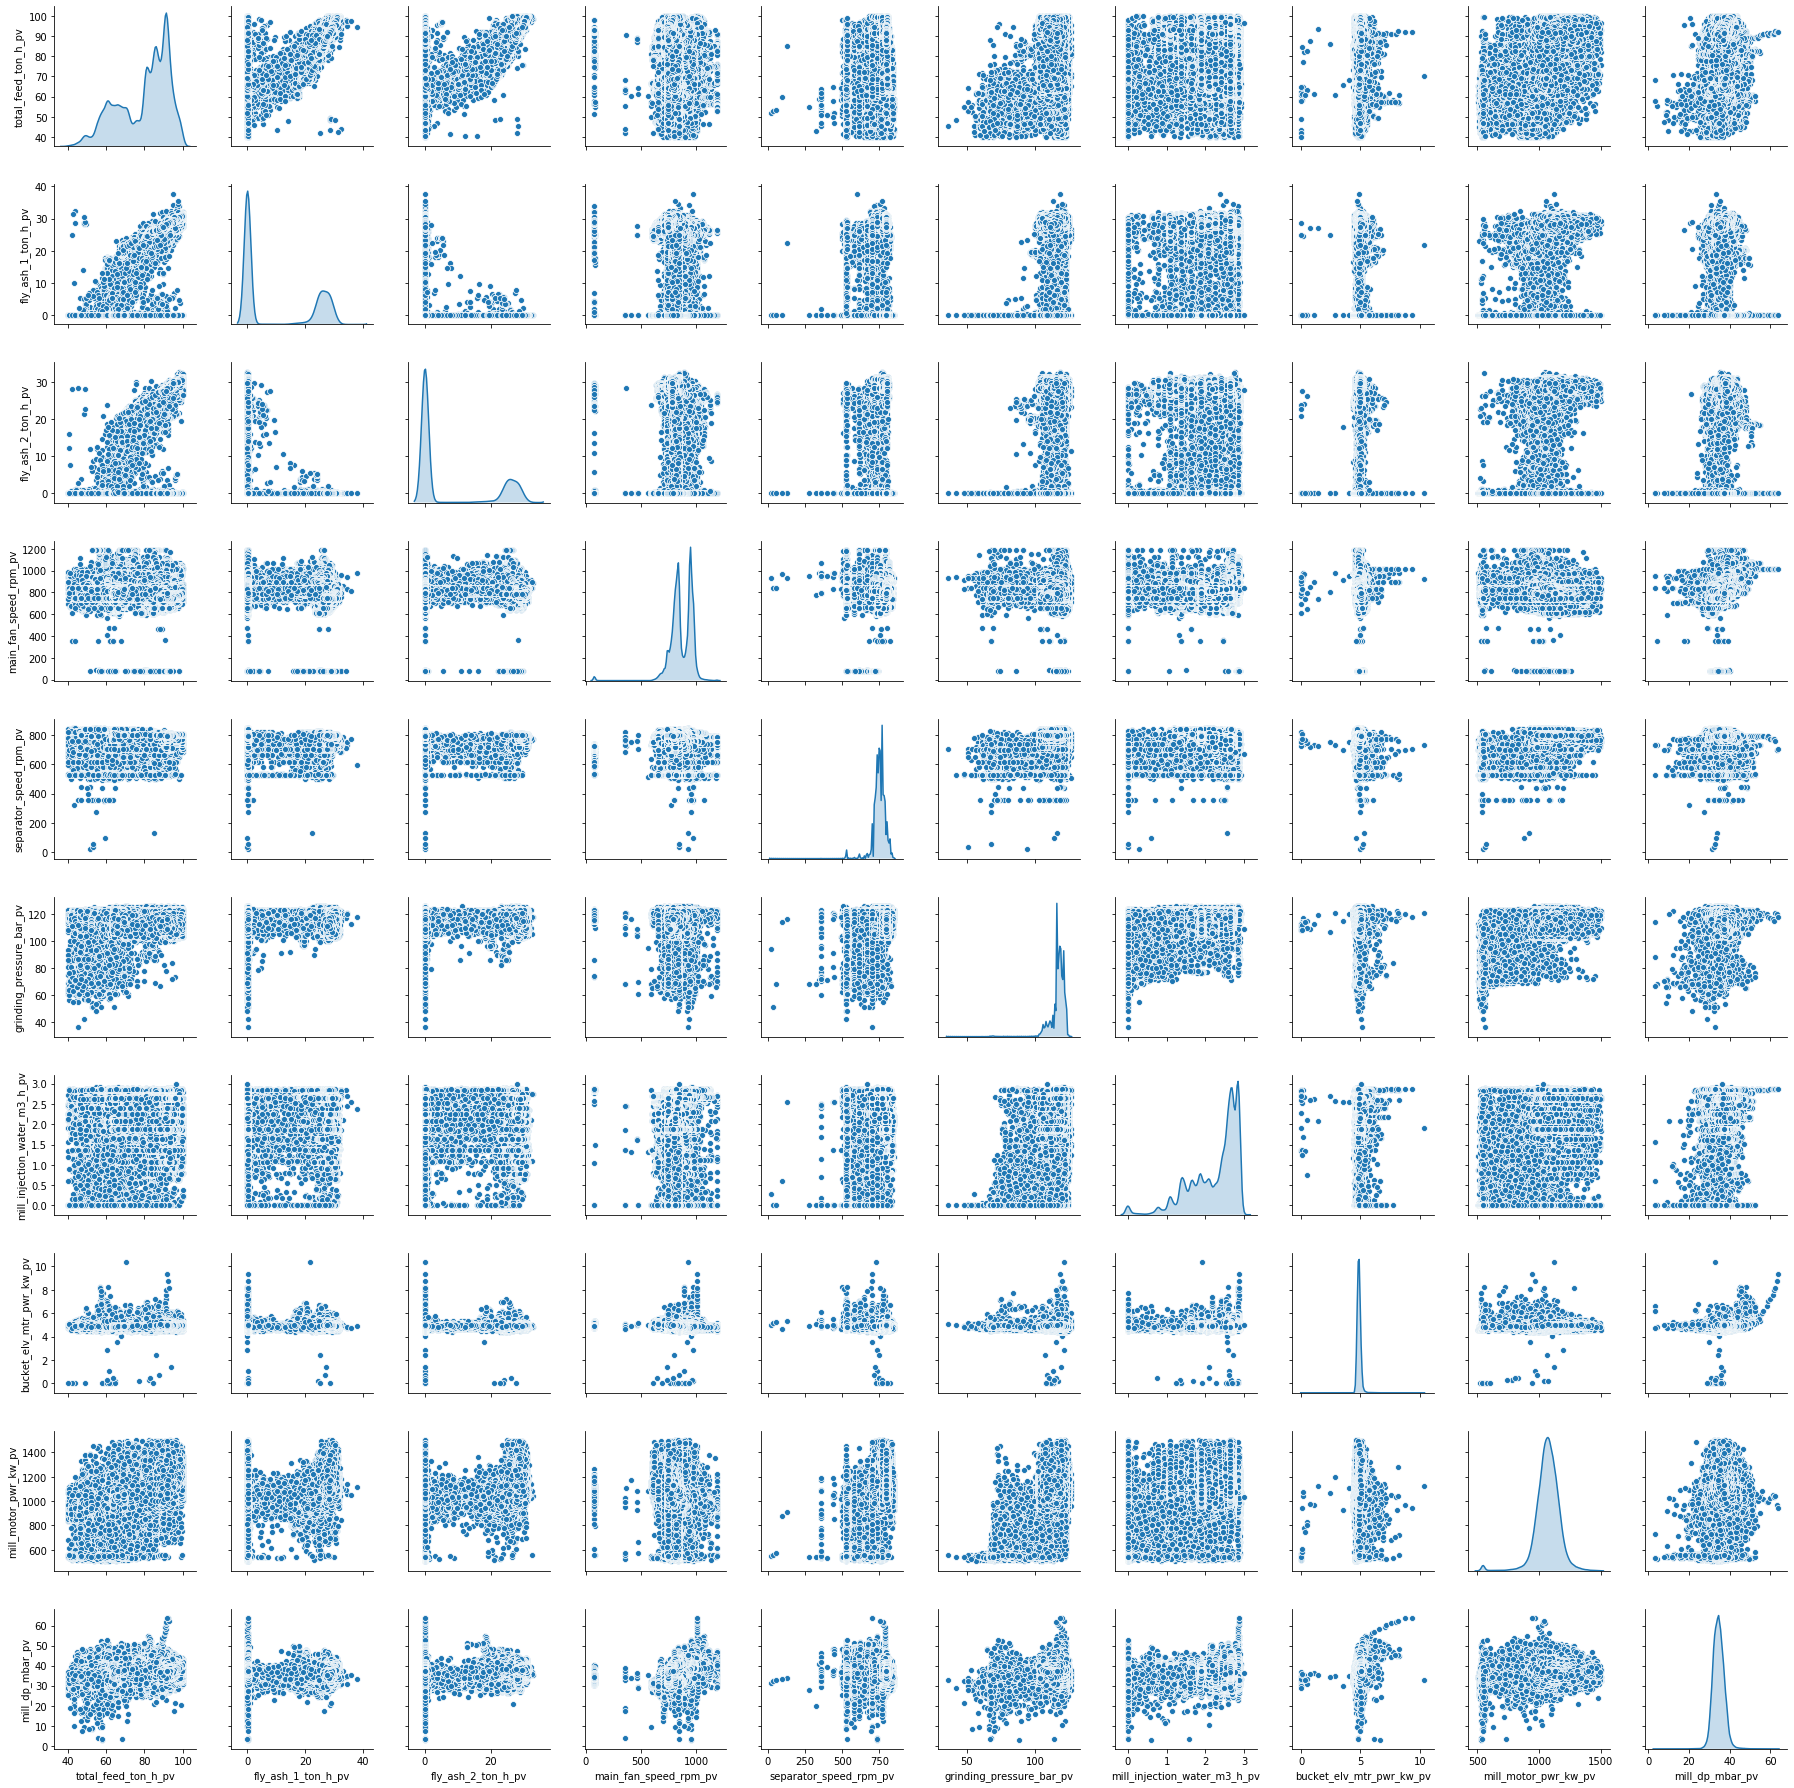

In [62]:
sns.pairplot(data_cem_iv, vars=['total_feed_ton_h_pv', 'fly_ash_1_ton_h_pv', 'fly_ash_2_ton_h_pv', 'main_fan_speed_rpm_pv',
                        'separator_speed_rpm_pv', 'grinding_pressure_bar_pv', 'mill_injection_water_m3_h_pv',
                        'bucket_elv_mtr_pwr_kw_pv', 'mill_motor_pwr_kw_pv', 'mill_dp_mbar_pv'] , diag_kind="kde")